In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def scaler(x,mean,std):
  return (x - mean) / std

In [3]:
def preprocess(feature):
  arr_pp = []
  mean = feature.mean().values
  std = feature.std().values
  for row in feature.values:
    arr_pp.append(list(map(scaler, row, mean, std)))
  return arr_pp

In [4]:
def split_data(data,index):
  if(index == 1):
    train = data.iloc[:614]
    test = data.iloc[614:]
  elif(index == 2):
    train_1 = data.iloc[:461]
    train_2 = data.iloc[615:768]
    train = pd.concat([train_1,train_2])
    test = data.iloc[461:615]
  elif(index == 3):
    train_1 = data.iloc[:307]
    train_2 = data.iloc[462:768]
    train = pd.concat([train_1, train_2])
    test = data.iloc[307:462]
  elif(index == 4):
    train_1 = data.iloc[:154]
    train_2 = data.iloc[308:768]
    train = pd.concat([train_1,train_2])
    test = data.iloc[154:308]
  elif(index == 5):
    train = data.iloc[155:768]
    test = data.iloc[:155]
  return train,test

In [5]:
def euclidean_distance(x1, x2):
  fn = lambda x1_p, x2_p: (x1_p - x2_p) ** 2
  return sum(list(map(fn, x1, x2))) ** 0.5

In [6]:
def classification(k, test_feature, train_feature, train_label):
  label = [(euclidean_distance(test_feature, tr_ftr), tr_lbl) 
            for tr_ftr, tr_lbl in zip(train_feature, train_label)]
  label = sorted(label, key=lambda y: y[0])[:k]
  label = [tr_lbl for tr_dist, tr_lbl in label]
  label = [label.count(0), label.count(1)]
  label = label.index(max(label))
  return label

In [7]:
def calculate_accuracy(k, test_feature, train_feature, test_label, train_label):
  size = len(test_label)
  accuracy = sum(1/size for ts_ftr, ts_lbl in zip(test_feature, test_label) 
                 if classification(k, ts_ftr, train_feature, train_label) == ts_lbl)
  return accuracy

In [8]:
def cross_validation(max_k, fold):
  fold_size = len(fold)
  k_accuracy_best, k_best = 0, 0
  arr_k =[]
  arr_accuracy = []
  for k in range(1, max_k+1, 2):
    k_accuracy = sum(calculate_accuracy(k, test_feature, train_feature, test_label, train_label) 
    for test_feature, train_feature, test_label, train_label in fold) / fold_size
    if k_accuracy > k_accuracy_best:
      k_best = k
      arr_k.append(k_best)
      k_accuracy_best = k_accuracy
      arr_accuracy.append(k_accuracy_best * 100)
  plt.title('Rata - rata akurasi')
  plt.xlabel('K')
  plt.ylabel('Akurasi (%)')
  plt.plot(arr_k,arr_accuracy, '-o')
  plt.show()
  return k_best, k_accuracy_best

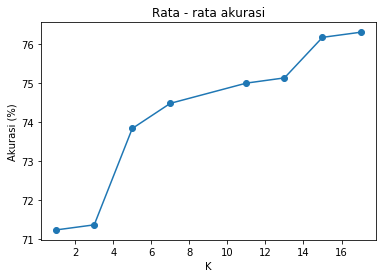

(17, 0.7629744449099279)

In [10]:
df = pd.read_csv('Diabetes.csv')
fold = []
for i in range(1, 6):
  train, test = split_data(df, i)
  test_feature = test.drop('Outcome', axis=1)
  test_label = test['Outcome'].to_numpy()
  train_feature = train.drop('Outcome', axis=1)
  train_label = train['Outcome'].to_numpy()
  test_feature = preprocess(test_feature)
  train_feature = preprocess(train_feature)
  fold.append((test_feature, train_feature, test_label, train_label))

cross_validation(20, fold)